In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("12-health_risk_classification.csv")

In [3]:
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


<Axes: xlabel='blood_pressure_variation', ylabel='activity_level_index'>

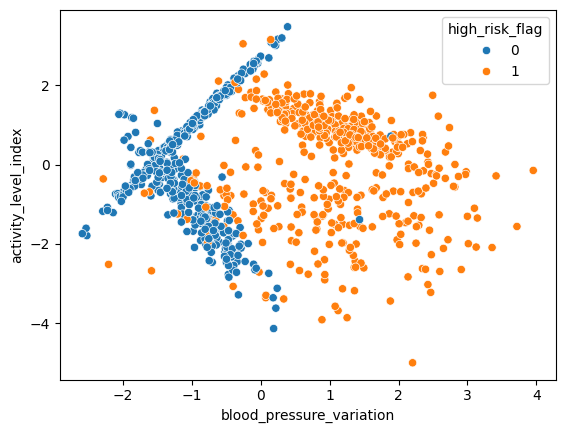

In [4]:
sns.scatterplot(x=df["blood_pressure_variation"]
               ,y=df["activity_level_index"],
               hue=df["high_risk_flag"])

In [5]:
X = df.drop("high_risk_flag", axis=1)
y = df["high_risk_flag"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15) 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, algorithm="auto", weights="uniform")
classifier.fit(X_train_scaled,y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [8]:
y_pred = classifier.predict(X_test_scaled)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [10]:
score = accuracy_score(y_pred,y_test)
print("score: ", score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n", confusion_matrix(y_pred,y_test))


score:  0.952
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       134
           1       0.92      0.98      0.95       116

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

confusion matrix: 
 [[124  10]
 [  2 114]]


In [11]:
df_reg = pd.read_csv("12-house_energy_regression.csv")

In [12]:
df_reg.head(
)

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


In [13]:
X = df_reg.drop("daily_energy_consumption_kwh", axis=1)
y = df_reg["daily_energy_consumption_kwh"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15) 

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
regressor = KNeighborsRegressor(n_neighbors=5)

In [18]:
regressor.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
y_pred = regressor.predict(X_test_scaled)

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [21]:
print("r2 score: ", r2_score(y_test,y_pred))
print("mean absolute error: ", mean_absolute_error(y_test,y_pred))
print("mean squared error: ", mean_squared_error(y_test,y_pred))


r2 score:  0.9183109118983248
mean absolute error:  9.228754406902722
mean squared error:  135.6610827281179
